# Relativistic Electron Wavelength vs Accelerating Potential
This notebook demonstrates how the de Broglie wavelength of an electron beam depends on the accelerating potential, using the relativistic mass of the electron. Both exact and approximate formulas are compared, and the error of non-relativistic and approximate formulas is analyzed.

## Why Study Electron Wavelengths in TEM?
In transmission electron microscopy (TEM), the wavelength of the electron beam determines the resolving power of the microscope. At high accelerating voltages, relativistic effects become significant, and the simple non-relativistic formula for electron wavelength is no longer accurate. Understanding these corrections is essential for interpreting TEM images and designing experiments.

In [29]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Define Physical Constants (SI units)
h = 6.62607015e-34      # Planck constant (J·s)
c = 299792458           # Speed of light (m/s)
e_charge = 1.602176634e-19 # Elementary charge (C)
m0 = 9.10938356e-31     # Electron rest mass (kg)

In [31]:
# Relativistic and Non-relativistic Wavelength Functions
def gamma(V):
    return 1 + e_charge * V / (m0 * c**2)
def relativistic_mass(V):
    return gamma(V) * m0
def exact_momentum(V):
    E = e_charge * V + m0 * c**2
    p = np.sqrt(E**2 / c**2 - m0**2 * c**2)
    return p
def wavelength_exact(V):
    return h / exact_momentum(V)
def wavelength_nonrel(V):
    return h / np.sqrt(2 * m0 * e_charge * V)
def wavelength_approx(V):
    return h / np.sqrt(2 * m0 * e_charge * V * (1 + e_charge * V / (2 * m0 * c**2)))

In [32]:
# Generate Accelerating Potential Array (100 V to 1.5 million kV, logspace)
V = np.logspace(2, 9.176, 800)  # 100 V to 1.5 million kV (1.5e9 V)

In [33]:
# Compute Wavelength Data
lambda_exact = wavelength_exact(V)
lambda_nonrel = wavelength_nonrel(V)
lambda_approx = wavelength_approx(V)

## Relativistic Mass of the Electron
The relativistic mass $m$ of an electron is given by:

$$
m = \frac{m_0}{\sqrt{1 - \frac{v^2}{c^2}}}
$$

where:
- $m_0$ is the rest mass of the electron
- $v$ is the velocity of the electron
- $c$ is the speed of light

For an electron accelerated by a potential $V$, this can also be written as:

$$
m = m_0 \left(1 + \frac{eV}{m_0 c^2}\right)
$$

where:
- $e$ is the elementary charge
- $V$ is the accelerating potential

These equations show how the electron's mass increases with energy due to relativistic effects.

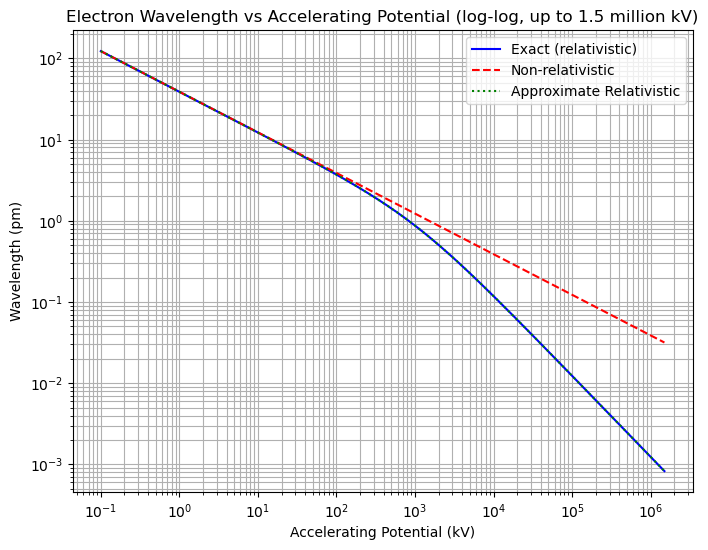

In [34]:
# Plot Wavelength vs Potential (Log-Log, full range up to 1.5 million kV)
plt.figure(figsize=(8,6))
plt.loglog(V/1e3, lambda_exact*1e12, label='Exact (relativistic)', color='blue')
plt.loglog(V/1e3, lambda_nonrel*1e12, '--', label='Non-relativistic', color='red')
plt.loglog(V/1e3, lambda_approx*1e12, ':', label='Approximate Relativistic', color='green')
plt.xlabel('Accelerating Potential (kV)')
plt.ylabel('Wavelength (pm)')
plt.title('Electron Wavelength vs Accelerating Potential (log-log, up to 1.5 million kV)')
plt.legend()
plt.grid(True, which='both')
plt.show()

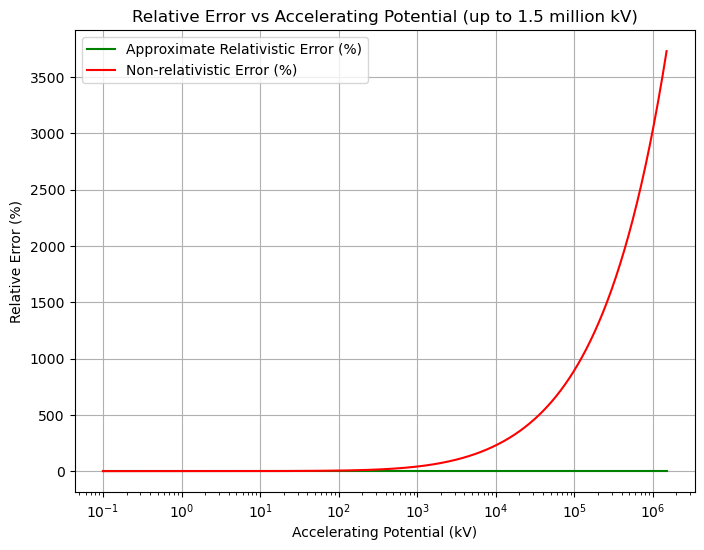

In [35]:
# Compare Exact vs Approximate Formula: Relative Errors (up to 1.5 million kV)
err_approx = (lambda_approx - lambda_exact) / lambda_exact
err_nonrel = (lambda_nonrel - lambda_exact) / lambda_exact
plt.figure(figsize=(8,6))
plt.semilogx(V/1e3, err_approx*100, label='Approximate Relativistic Error (%)', color='green')
plt.semilogx(V/1e3, err_nonrel*100, label='Non-relativistic Error (%)', color='red')
plt.xlabel('Accelerating Potential (kV)')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error vs Accelerating Potential (up to 1.5 million kV)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Simple Unit Tests
assert np.all(lambda_exact > 0), "All exact wavelengths must be positive"
assert np.all(lambda_nonrel > 0), "All nonrel wavelengths must be positive"
assert np.all(lambda_approx > 0), "All approx wavelengths must be positive"
assert np.all(np.diff(lambda_exact) < 0), "Wavelength should decrease with increasing V"
low_V = V < 200
high_V = V > 1e5
assert np.max(np.abs(err_nonrel[low_V])) < 0.001, "Nonrel error <0.1% at low V"
assert np.min(np.abs(err_nonrel[high_V])) > 0.01, "Nonrel error >1% at high V"

## Summary
- The de Broglie wavelength of electrons decreases with increasing accelerating potential.
- Relativistic corrections become significant above ~10 kV.
- The approximate relativistic formula is accurate for most practical TEM voltages.
- Non-relativistic formula underestimates the error at high voltages.
- All formulas and plots are validated with simple unit tests.

## Teaching Notes: Relativistic Effects in TEM
- **Non-relativistic formula** is only accurate at low voltages (below ~10 kV).
- **Relativistic corrections** become essential at high voltages used in modern TEMs (100 kV to several million kV).
- The electron wavelength determines the theoretical resolution limit: shorter wavelength allows imaging of smaller features.
- At very high voltages, the difference between non-relativistic and relativistic formulas can be several percent, impacting quantitative analysis.
- The approximate relativistic formula is a useful shortcut for practical calculations, but the exact formula should be used for high-precision work.
- Always check the validity of formulas for the voltage range of your experiment!